### VEDANT GAUTAM
#### Prediction using Supervised ML
##### Prediction of percentage of marks fo a student based on the number of study hours

In [1]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
#Reading Data
dat = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print('Data Imported Successfully')

Data Imported Successfully


In [3]:
dat.shape

(25, 2)

Lets have a look at the data

In [4]:
dat.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Analysis of Data

In [5]:
#Check for null values
dat.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
#Getting insight of data
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
dat.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualization of Data

Text(0, 0.5, 'Percentage Score')

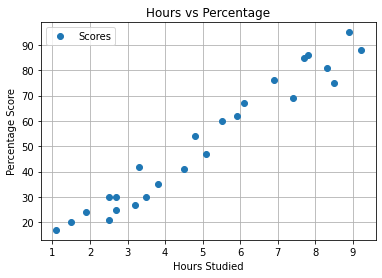

In [8]:
dat.plot(x="Hours",y="Scores",style='o',grid=True)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

#### The graph shows linear relationship between the nubmer of hours studied and the score gained

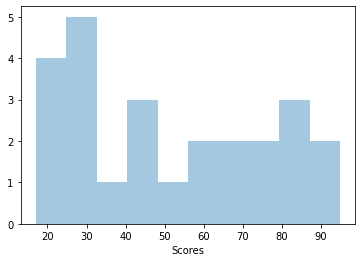

In [9]:
sns.distplot(dat['Scores'],bins=10,kde=False)

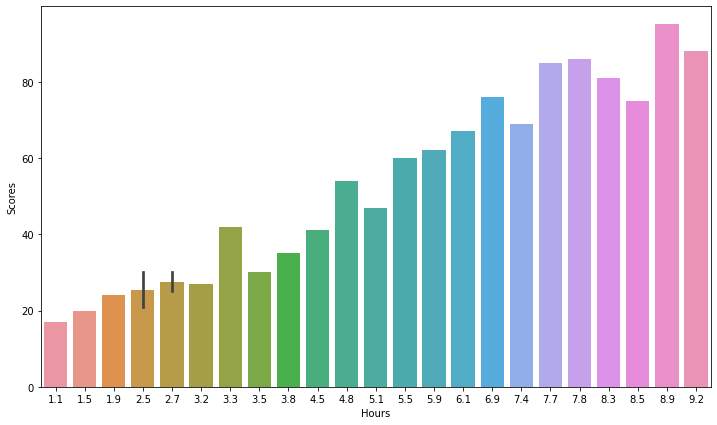

In [10]:
plt.figure(figsize=(12,7))
sns.barplot(x="Hours",y='Scores',data=dat)

#### Preparing Data

In [11]:
x = dat.iloc[:,:-1].values
y = dat.iloc[:,1].values

In [12]:
#Spliting train and test data
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,
                                                    random_state=0)

### Model Building

In [13]:
reg = LinearRegression()
reg.fit(X_train,Y_train)
print('Training Complete.............')

Training Complete.............


In [14]:
coeff = reg.coef_
intercept = reg.intercept_

line = coeff*x + intercept

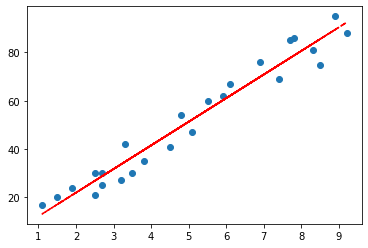

In [15]:
plt.plot(x,y,'o')
plt.plot(x,line,'r--')

### Prediction

In [16]:
#Predicting Test Data
pred = reg.predict(X_test)

In [17]:
#Comparing actual vs predicted
df = pd.DataFrame({'Acutal':Y_test,'Predicted':pred})
df

,Acutal,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


## Model Evaluation

In [18]:
print('Mean Absolute Error:',
     mean_absolute_error(Y_test,pred))

Mean Absolute Error: 4.419727808027652


In [19]:
print('Mean squared error:',
     mean_squared_error(Y_test,pred))

Mean squared error: 22.96509721270043


In [20]:
print('R2 Score:', r2_score(Y_test,pred))

R2 Score: 0.9568211104435257


### A high R2 Score and other evaluation results show that Model is performing with a good accuracy